<a href="https://colab.research.google.com/github/Khaneul1/express-test/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%98%A4%EC%98%88%EB%B9%88_%EA%B3%A0%ED%95%98%EB%8A%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(777)

In [7]:
#학습 및 검증할 테스트 셋 분할하기
fashion_mnist = keras.datasets.fashion_mnist
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

In [8]:
#데이터 차원 확인하기
train_x.shape #(60000, 28, 28) : 6만개 이미지를 가진 28*28 크기의 그림

(60000, 28, 28)

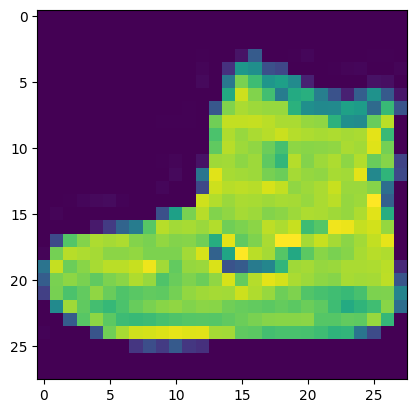

In [9]:
plt.imshow(train_x[0]) #이미지 확인 과정

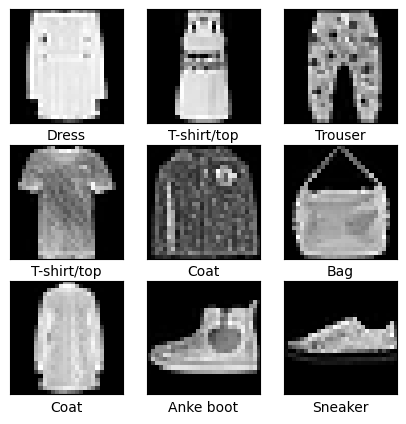

In [11]:
#분류 레이블 생성 후 데이터 그리기
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Anke boot']
sample_size = 9
random_idx = np.random.randint(60000, size = sample_size)

plt.figure(figsize=(5,5))
for i, idx in enumerate(random_idx):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_x[idx], cmap='gray')
  plt.xlabel(class_names[train_y[idx]])
plt.show()

In [12]:
#1.값의 범위 조정 필요 (정규화하기)
train_x = train_x / 255
test_x = test_x / 255

#2.수치형을 범주형으로 변경
from tensorflow.keras.utils import to_categorical #실제 정답 비교 위해 0-9 정답지 따로 저장하기
real_test_y = test_y

#레이블 데이터 -> 범주형
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

#3.훈련 및 검증 데이터를 70:30 비율로 분리
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.3, random_state=777)
train_x.shape

(42000, 28, 28)

In [16]:
#reshape을 통해 이미지 채널 차원 추가하기
train_x = train_x.reshape(-1, 28,28,1)
val_x = val_x.reshape(-1, 28,28,1)
test_x = test_x.reshape(-1, 28,28,1)

In [18]:
#컨볼루션 레이어 설정
from tensorflow.keras import models, layers
model = models.Sequential()

#첫 번째 레이어
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))

#두 번째 레이어
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary() #모델 구조 출력해서 확인해 보기

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 234,410 (915.66 KB)

 Trainable params: 234,410 (915.66 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
#CNN 만들기
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

es = keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience=10,
    restore_best_weights=True
)

#학습용 데이터와 검증용 데이터 저장하기
history = model.fit(train_x, train_y, epochs=1000, batch_size=128, validation_data=(val_x, val_y), callbacks=[es])

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
329/329 ━━━━━━━━━━━━━━━━━━━━ 48s 143ms/step - accuracy: 0.6186 - loss: 1.0945 - val_accuracy: 0.8426 - val_loss: 0.4451
Epoch 2/1000
329/329 ━━━━━━━━━━━━━━━━━━━━ 76s 125ms/step - accuracy: 0.8264 - loss: 0.4783 - val_accuracy: 0.8677 - val_loss: 0.3897
Epoch 3/1000
329/329 ━━━━━━━━━━━━━━━━━━━━ 79s 116ms/step - accuracy: 0.8500 - loss: 0.4196 - val_accuracy: 0.8789 - val_loss: 0.3525
Epoch 4/1000
329/329 ━━━━━━━━━━━━━━━━━━━━ 43s 122ms/step - accuracy: 0.8617 - loss: 0.3841 - val_accuracy: 0.8818 - val_loss: 0.3357
Epoch 5/1000
329/329 ━━━━━━━━━━━━━━━━━━━━ 39s 118ms/step - accuracy: 0.8671 - loss: 0.3702 - val_accuracy: 0.8758 - val_loss: 0.3454
Epoch 6/1000
329/329 ━━━━━━━━━━━━━━━━━━━━ 41s 119ms/step - accuracy: 0.8741 - loss: 0.3454 - val_accuracy: 0.8930 - val_loss: 0.3045
Epoch 7/1000
329/329 ━━━━━━━━━━━━━━━━━━━━ 42s 124ms/step - accuracy: 0.8736 - loss: 0.3474 - val_accuracy: 0.8967 - val_loss: 0.2932
Epoch 8/1000
329/329 ━━━━━━━━━━━━━━━━━━━━ 38s 115ms/step - accuracy: 

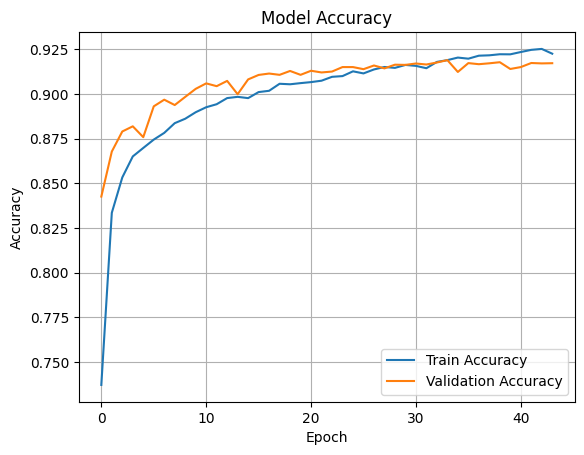

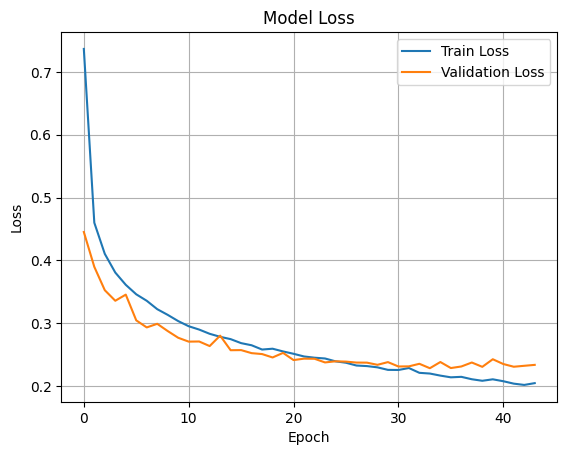

In [23]:
#학습 결과 그리기
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


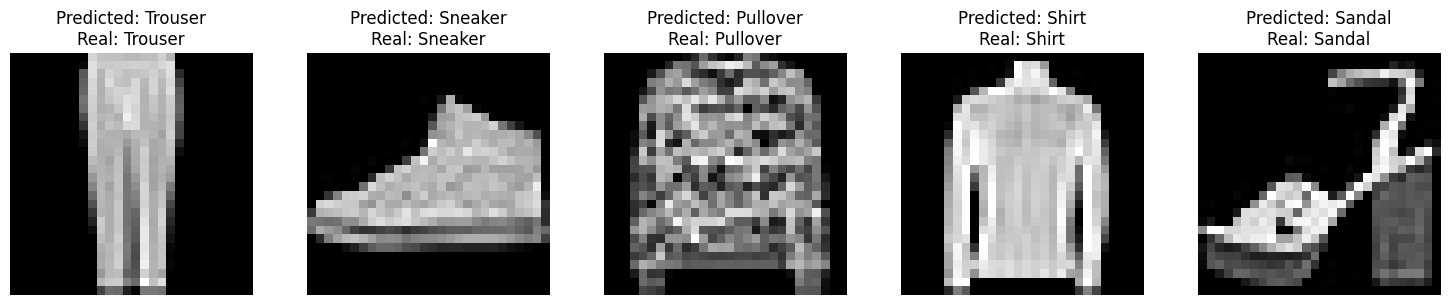

In [30]:
results = model.predict(test_x)
arg_results = np.argmax(results, axis=-1) #예측 결과 만들기

num_images = 5 #시각화할 이미지 개수! 우선 5개부터 시작
random_idxs = np.random.choice(len(test_x), num_images, replace=False) #랜덤으로 이미지를 하나 골라서 시각화
#중복 없이 랜덤으로 선택하고, 총 5개의 이미지 데이터를 시각화함

fig, axes = plt.subplots(1, num_images, figsize=(15,3))

for i, idx in enumerate(random_idxs):
  axes[i].imshow(test_x[idx].reshape(28,28), cmap='gray')
  axes[i].set_title(f'Predicted: {class_names[arg_results[idx]]}\nReal: {class_names[np.argmax(test_y[idx])]}')
  axes[i].axis('off')

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


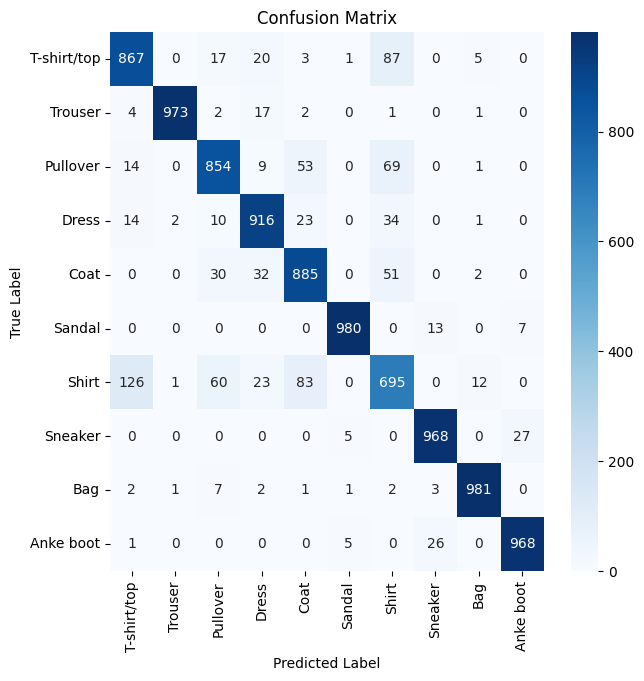

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.87      0.86      1000
     Trouser       1.00      0.97      0.98      1000
    Pullover       0.87      0.85      0.86      1000
       Dress       0.90      0.92      0.91      1000
        Coat       0.84      0.89      0.86      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.74      0.69      0.72      1000
     Sneaker       0.96      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
   Anke boot       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [34]:
#혼동 행렬을 통해 모델 성능 평가하기
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

#1. 모델 예측
results = model.predict(test_x)
predicted_labels = np.argmax(results, axis=1)
true_labels = np.argmax(test_y, axis=1) #train_y와 train_x가 원-핫 인코딩 되어 있기 때문에 정수형 라벨로 변환해 주기

#2. 혼동 행렬 계산 && 시각화
cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#3. 분류 리포트 :: 정확도/정밀도/재현율
print(classification_report(true_labels, predicted_labels, target_names=class_names))